# Actividad Practica 2: Visualizaciones

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb

from sklearn.impute import SimpleImputer

## Importar dataset

In [34]:
df = pd.read_csv("./datasets/athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Descripcion de los datos

In [35]:
# Evaluar el numero de entradas nulas por cada columna
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [37]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [38]:
df.describe(exclude="number")

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


## Visualizaciones - Matplotlib

In [39]:
mpl.style.available
mpl.style.use('bmh')

### Evolucion temporal de los juegos

In [40]:
# Datos de cantidad de participantes por año filtrados por género
df_conteo_masculino = df[df["Sex"]=="M"].groupby("Year").count()
df_conteo_femenino = df[df["Sex"]=="F"].groupby("Year").count()
x1m, y1m = df_conteo_masculino.index, df_conteo_masculino["ID"]
x1f, y1f = df_conteo_femenino.index, df_conteo_femenino["ID"]

In [41]:
# Datos del peso promedio de los participantes por año filtrados por género
aux_m = df[df["Sex"]=="M"] # filtrar por genero masculino
aux_f = df[df["Sex"]=="F"] # filtrar por genero femenino

df_peso_masculino = aux_m[["Year","Weight"]].groupby("Year").mean()
df_peso_femenino = aux_f[["Year","Weight"]].groupby("Year").mean()

df_peso_masculino["mean+std"] =df_peso_masculino["Weight"] + aux_m[["Year","Weight"]].groupby("Year").std()["Weight"]
df_peso_femenino["mean+std"] = df_peso_femenino["Weight"] + aux_f[["Year","Weight"]].groupby("Year").std()["Weight"]

df_peso_masculino["mean-std"] = df_peso_masculino["Weight"] - aux_m[["Year","Weight"]].groupby("Year").std()["Weight"]
df_peso_femenino["mean-std"] = df_peso_femenino["Weight"] - aux_f[["Year","Weight"]].groupby("Year").std()["Weight"]

x2m, y2m = df_peso_masculino.index, df_peso_masculino["Weight"]
x2f, y2f = df_peso_femenino.index, df_peso_femenino["Weight"]

y2m_plus_2std = df_peso_masculino["mean+std"]
y2f_plus_2std = df_peso_femenino["mean+std"]
y2m_minus_2std = df_peso_masculino["mean-std"]
y2f_minus_2std = df_peso_femenino["mean-std"]


In [42]:
# Datos de la estatura promedio de los participantes por año filtrados por género
# se agrega columnas de promedio +/- 2 desviaciones estandar

aux_m = df[df["Sex"]=="M"] # filtrar por genero masculino
aux_f = df[df["Sex"]=="F"] # filtrar por genero femenino
df_estatura_masculino = aux_m[["Year","Height"]].groupby("Year").mean()
df_estatura_femenino = aux_f[["Year","Height"]].groupby("Year").mean()

df_estatura_masculino["mean+std"] = df_estatura_masculino["Height"] + aux_m[["Year","Height"]].groupby("Year").std()["Height"]
df_estatura_femenino["mean+std"] = df_estatura_femenino["Height"] + aux_f[["Year","Height"]].groupby("Year").std()["Height"]

df_estatura_masculino["mean-std"] = df_estatura_masculino["Height"] - aux_m[["Year","Height"]].groupby("Year").std()["Height"]
df_estatura_femenino["mean-std"] = df_estatura_femenino["Height"] - aux_f[["Year","Height"]].groupby("Year").std()["Height"]

x3m, y3m = df_estatura_masculino.index, df_estatura_masculino["Height"]
x3f, y3f = df_estatura_femenino.index, df_estatura_femenino["Height"]

y3m_plus_2std = df_estatura_masculino["mean+std"]
y3f_plus_2std = df_estatura_femenino["mean+std"]
y3m_minus_2std = df_estatura_masculino["mean-std"]
y3f_minus_2std = df_estatura_femenino["mean-std"]


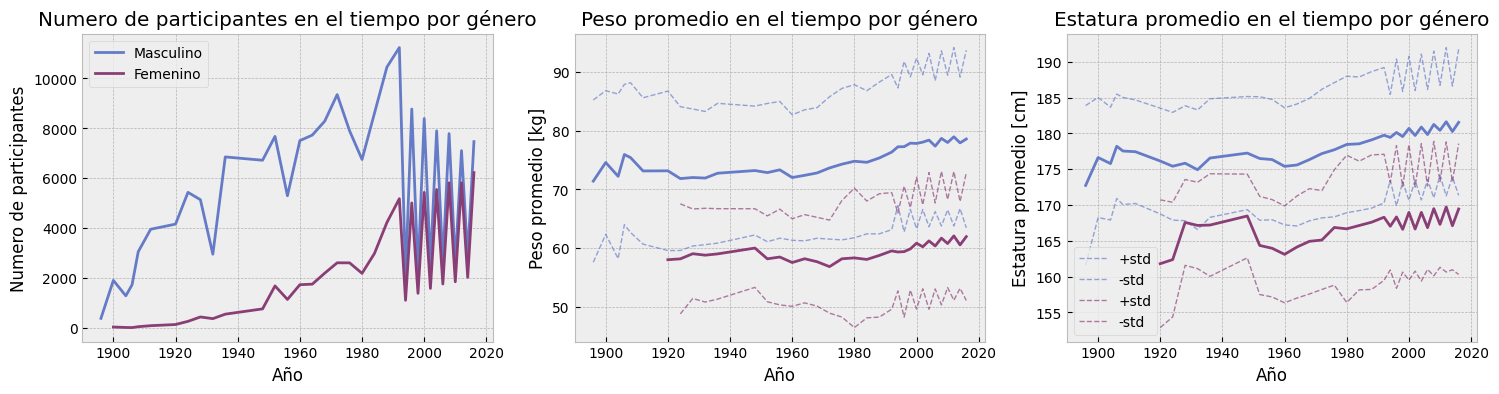

In [43]:
# Graficos de evolucion temporal
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(18, 4), nrows=1, ncols=3)

ax1.plot(x1m, y1m, color="#657bc7", label="Masculino")
ax1.plot(x1f, y1f, color="#8a3e76", label="Femenino")
ax1.set_title("Numero de participantes en el tiempo por género")
ax1.set_xlabel("Año")
ax1.set_ylabel("Numero de participantes")
ax1.legend()

ax2.plot(x2m, y2m, color="#657bc7", label="Masculino")
ax2.plot(y2m_plus_2std, "--", color="#657bc7aa", label="+std", linewidth=1)
ax2.plot(y2m_minus_2std, "--", color="#657bc7aa", label="-std", linewidth=1)
ax2.plot(x2f, y2f, color="#8a3e76", label="Femenino")
ax2.plot(y2f_plus_2std, "--", color="#8a3e76aa", label="+std", linewidth=1)
ax2.plot(y2f_minus_2std, "--", color="#8a3e76aa", label="-std", linewidth=1)
ax2.set_title("Peso promedio en el tiempo por género")
ax2.set_xlabel("Año")
ax2.set_ylabel("Peso promedio [kg]")
# ax2.legend()

ax3.plot(x3m, y3m, color="#657bc7")
ax3.plot(y3m_plus_2std, "--", color="#657bc7aa", label="+std", linewidth=1)
ax3.plot(y3m_minus_2std, "--", color="#657bc7aa", label="-std", linewidth=1)
ax3.plot(x3f, y3f, color="#8a3e76")
ax3.plot(y3f_plus_2std, "--", color="#8a3e76aa", label="+std", linewidth=1)
ax3.plot(y3f_minus_2std, "--", color="#8a3e76aa", label="-std", linewidth=1)
ax3.set_title("Estatura promedio en el tiempo por género")
ax3.set_xlabel("Año")
ax3.set_ylabel("Estatura promedio [cm]")
ax3.legend()

### Medallero olimpico

In [44]:
# Reemplazar valores NaN de la columna "Medal" con el texto "No Medal"
df["Medal"] = df["Medal"].replace(to_replace=np.nan, value="No Medal")

In [45]:
df["Medal_Code"] = 1

In [46]:
df_agrupacion_medallero = df[["Team", "Medal", "Medal_Code"]].groupby(["Team", "Medal"]).sum()

In [47]:
# Crear medallero
df_medallero = pd.DataFrame()
df_medallero["Gold"] = df_agrupacion_medallero.xs("Gold",level=1)["Medal_Code"]
df_medallero["Silver"] = df_agrupacion_medallero.xs("Silver",level=1)["Medal_Code"]
df_medallero["Bronze"] = df_agrupacion_medallero.xs("Bronze",level=1)["Medal_Code"]

# Reemplazar valores NaN con ceros
df_medallero = df_medallero.replace(to_replace=np.nan, value=0)

# Ordenar por numero de medallas de oro de forma descendente
df_medallero = df_medallero.sort_values("Gold", ascending=False)

# change data type
df_medallero = df_medallero.convert_dtypes(np.int64)


In [48]:
# Obtener top 10
df_top_ten = df_medallero[:10]
df_top_ten

,Gold,Silver,Bronze
Team,,,
United States,2474,1512,1233
Soviet Union,1058,716,677
Germany,679,627,678
Italy,535,508,484
Great Britain,519,582,572
France,455,518,577
Sweden,451,476,507
Hungary,432,330,365
Canada,422,413,408


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Soviet Union'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Italy'),
  Text(4, 0, 'Great Britain'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Sweden'),
  Text(7, 0, 'Hungary'),
  Text(8, 0, 'Canada'),
  Text(9, 0, 'East Germany')])

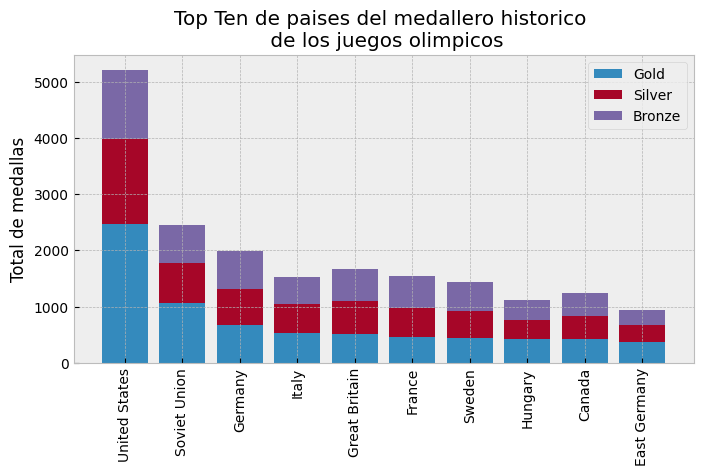

In [49]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Top Ten de paises del medallero historico \n de los juegos olimpicos")
ax.set_ylabel("Total de medallas")
ax.bar(df_top_ten.index, df_top_ten["Gold"], label="Gold")
ax.bar(df_top_ten.index, df_top_ten["Silver"], label="Silver", bottom=df_top_ten["Gold"])
ax.bar(df_top_ten.index, df_top_ten["Bronze"], label="Bronze", bottom=df_top_ten["Gold"]+df_top_ten["Silver"])
ax.legend()

plt.xticks(rotation=90)

### Analisis por tipo de deporte

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Athletics'),
  Text(1, 0, 'Gymnastics'),
  Text(2, 0, 'Swimming'),
  Text(3, 0, 'Shooting'),
  Text(4, 0, 'Cycling'),
  Text(5, 0, 'Fencing'),
  Text(6, 0, 'Rowing'),
  Text(7, 0, 'Cross Country Skiing'),
  Text(8, 0, 'Alpine Skiing'),
  Text(9, 0, 'Wrestling')])

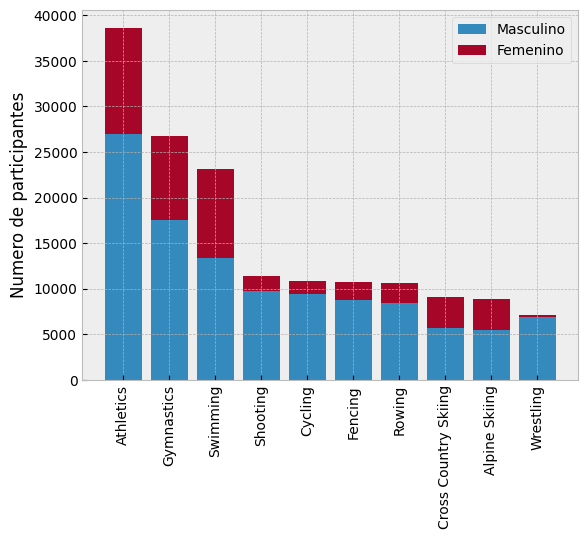

In [56]:
# Grafico de barra de participantes por deporte

fig, ax = plt.subplots()

bottom = np.zeros(len(df_top_ten))

for col in df_top_ten.columns[:-1]:
    ax.bar(df_top_ten.index, df_top_ten[col], label=col, bottom=bottom)

    bottom += df_top_ten[col]

ax.set_ylabel("Numero de participantes")
ax.legend()

plt.xticks(rotation=90)